In [4]:
!ls
import matplotlib.pyplot as plt

Minimally_Trained_MesoInception4_on_rnd_with_F2F_summary.txt
Plotting Data.ipynb
Untrained_Meso4_on_avg_with_DF_summary.txt
Untrained_Meso4_on_avg_with_F2F_summary.txt
Untrained_Meso4_on_diff_with_DF_summary.txt
Untrained_Meso4_on_diff_with_F2F_summary.txt
Untrained_Meso4_on_rnd_with_DF_summary.txt
Untrained_Meso4_on_rnd_with_F2F_summary.txt
Untrained_MesoInception4_on_avg_with_DF_summary.txt
Untrained_MesoInception4_on_avg_with_F2F_summary.txt
Untrained_MesoInception4_on_diff_with_DF_summary.txt
Untrained_MesoInception4_on_diff_with_F2F_summary.txt
Untrained_MesoInception4_on_rnd_with_DF_summary.txt
Untrained_MesoInception4_on_rnd_with_F2F_summary.txt
plots


In [5]:
def extract_data(file):
    data_file = open(file, "r")

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    while True:

        line = data_file.readline()
        if not line:
            break

        if "THRESHOLD" in line:
                thresholds.append(float(line[-5:-1]))

        if "REAL" in line:
            precisions.append(float(line[19:23]))
            recalls.append(float(line[29:33]))
            f1_scores.append(float(line[39:43]))

    data_file.close()
    
    return (thresholds, precisions, recalls, f1_scores)

In [40]:
def plot_data(file, thresholds, precisions, recalls, f1_scores, title=""):
    f = plt.figure(figsize=(4,3))
    plt.plot(thresholds, precisions, label="Precision")
    plt.plot(thresholds, recalls, label="Recall")
    plt.plot(thresholds, f1_scores, label="F1 Score")
    plt.xlabel('Threshold')
#     plt.ylabel('Accuracy')
#     plt.title(file[:-4].replace("_", " "))
    f.suptitle(title, fontsize=7)
#     plt.title(title, wrap=True)
    plt.legend(loc='upper left')
    plt.show()

    f.savefig("plots/"+file[:-11]+"plot.pdf", bbox_inches='tight')


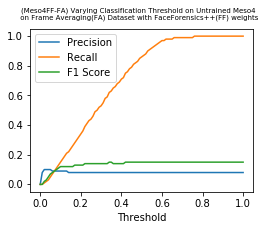

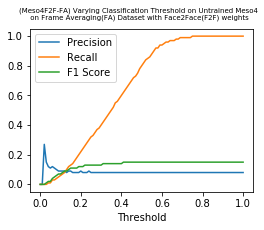

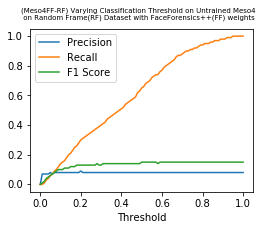

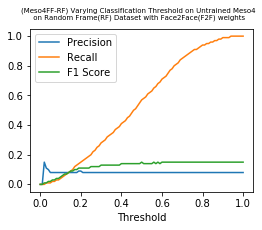

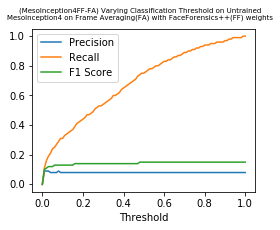

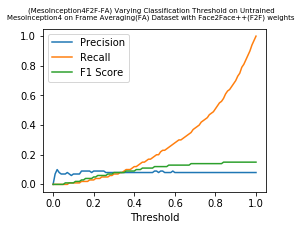

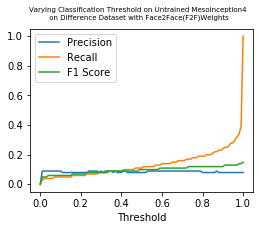

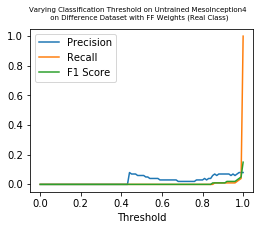

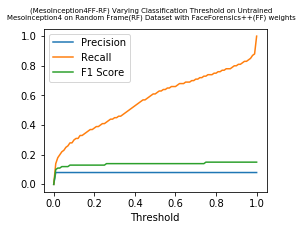

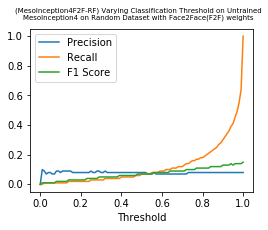

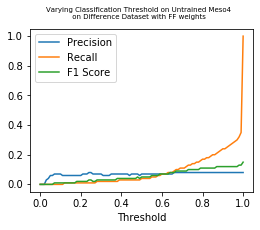

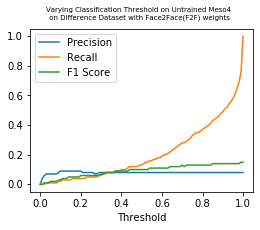

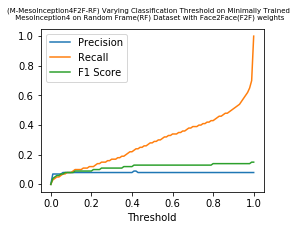

In [43]:
files = []
file1 = ("Untrained_Meso4_on_avg_with_DF_summary.txt", "(Meso4FF-FA) Varying Classification Threshold on Untrained Meso4\n on Frame Averaging(FA) Dataset with FaceForensics++(FF) weights")
file2 = ("Untrained_Meso4_on_avg_with_F2F_summary.txt", "(Meso4F2F-FA) Varying Classification Threshold on Untrained Meso4\n on Frame Averaging(FA) Dataset with Face2Face(F2F) weights")
file3 = ("Untrained_Meso4_on_rnd_with_DF_summary.txt", "(Meso4FF-RF) Varying Classification Threshold on Untrained Meso4\n on Random Frame(RF) Dataset with FaceForensics++(FF) weights")
file4 = ("Untrained_Meso4_on_rnd_with_F2F_summary.txt", "(Meso4FF-RF) Varying Classification Threshold on Untrained Meso4\n on Random Frame(RF) Dataset with Face2Face(F2F) weights")
file5 = ("Untrained_MesoInception4_on_avg_with_DF_summary.txt", "(MesoInception4FF-FA) Varying Classification Threshold on Untrained\nMesoInception4 on Frame Averaging(FA) with FaceForensics++(FF) weights")
file6 = ("Untrained_MesoInception4_on_avg_with_F2F_summary.txt", "(MesoInception4F2F-FA) Varying Classification Threshold on Untrained\nMesoInception4 on Frame Averaging(FA) Dataset with Face2Face++(F2F) weights")
file7 = ("Untrained_MesoInception4_on_diff_with_F2F_summary.txt", "Varying Classification Threshold on Untrained MesoInception4\n on Difference Dataset with Face2Face(F2F)Weights")
file8 = ("Untrained_MesoInception4_on_diff_with_DF_summary.txt", "Varying Classification Threshold on Untrained MesoInception4\n on Difference Dataset with FF Weights (Real Class)")
file9 = ("Untrained_MesoInception4_on_rnd_with_DF_summary.txt", "(MesoInception4FF-RF) Varying Classification Threshold on Untrained\nMesoInception4 on Random Frame(RF) Dataset with FaceForensics++(FF) weights")
file10 = ("Untrained_MesoInception4_on_rnd_with_F2F_summary.txt", "(MesoInception4F2F-RF) Varying Classification Threshold on Untrained\nMesoInception4 on Random Dataset with Face2Face(F2F) weights")
file11 = ("Untrained_Meso4_on_diff_with_DF_summary.txt", "Varying Classification Threshold on Untrained Meso4\n on Difference Dataset with FF weights")
file12 = ("Untrained_Meso4_on_diff_with_F2F_summary.txt", "Varying Classification Threshold on Untrained Meso4\n on Difference Dataset with Face2Face(F2F) weights")
file13 = ["Minimally_Trained_MesoInception4_on_rnd_with_F2F_summary.txt", "(M-MesoInception4F2F-RF) Varying Classification Threshold on Minimally Trained\n MesoInception4 on Random Frame(RF) Dataset with Face2Face(F2F) weights"]


files = [file1, file2,file3,file4, file5, file6, file7, file8, file9, file10, file11, file12, file13]

for file in files:
    thresholds, precisions, recalls, f1_scores =  extract_data(file[0])
    plot_data(file[0], thresholds, precisions, recalls, f1_scores, file[1])

In [233]:
import random 
import numpy as np
trues = []
preds = []
n = 10
acc = 0.59
acc = 1-acc
Y_true = []
Y_pred = []
# print(random.randint(0,1))
for j in range(0,4):
    for i in range(0,n):
        pred = random.randint(0,1)
        Y_pred.append(pred)
        randnum = random.randint(0,1)
        Y_true.append(randnum)
        
    print(Y_true)
    preds.extend([[Y_true]])
#     Y_true.append(pred)
#     if randnum >= (acc * 100):
    
#     else: 
# #         if pred == 0:
#     Y_true.append(randnum)
#         elif pred == 1:
#             Y_true.append(0)
#         else:
#             Y_true.append(0)

print(Y_true)
print(Y_pred)


[0, 1, 1, 0, 0, 1, 0, 0, 0, 1]
[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]
[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]


In [234]:
l = []

b = [2,1]

l.append(b)
l

[[2, 1]]

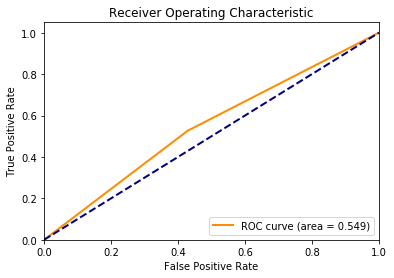

In [235]:

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


fpr, tpr, _ = roc_curve(Y_true, Y_pred)
try:
    roc_auc = auc(fpr, tpr)
except:
    pass
    
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

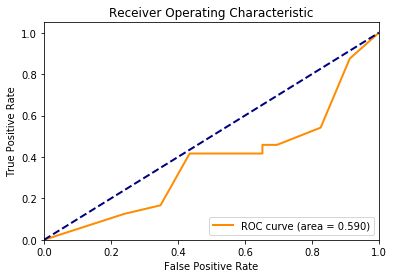

In [231]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2, 1, 5, 3, 7, 2, 2,1,1, 5, 6, 7, 2, 2,1,1, 5, 6, 7, 2, 2,1, 2, 2,1,1, 5, 6, 7, 2, 2,1,1, 1, 2, 2, 1, 5, 6, 7, 2, 2,1,1, 5, 6, 7, 2, 2,1,1, 5, 6, 7, 2, 2,1, 2, 2,1,1, 5, 6, 7, 2, 2,1])
pred = np.array([0.1, 0.4, 0.35, 0.1, 0.9, 0.7, 0.1, 0.3, 0.75, 0.1, 0.3,0.35, 0.1, 0.9, 0.7, 0.1, 0.3, 0.75,0.35, 0.8, 0.9, 0.7, 0.9, 0.3, 0.75, 0.3, 0.75,0.35, 0.8, 0.9, 0.7, 0.9, 0.3, 0.75, 0.68,0.1, 0.4, 0.35, 0.8, 0.9, 0.7, 0.9, 0.3, 0.75, 0.6, 0.3,0.35, 0.8, 0.9, 0.7, 0.9, 0.3, 0.75,0.35, 0.8, 0.9, 0.7, 0.9, 0.3, 0.75, 0.3, 0.75,0.35, 0.8, 0.9, 0.7, 0.9, 0.3, 0.75, 0.68])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [313]:
xs = [x for x in range(0,100)]
xs


 49,
 54,
 58,
 61,
 64,
 66,
 68,
 70,
 72,
 75,
 78,
 79,
 79,
79,
 80,
 80,
 80,
 81,
 81,
 81,
 81,
 81,
 82,
82,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,97,98,99]

In [314]:
# epoch = range(0,100)
auc_validation = [0.57, 0.58, 0.6, 0.65, 0.69, 0.66, 0.65, 0.65, 0.66, 0.67, 0.68, 0.67, 0.69, 0.69,0.7, 0.69, 0.68, 0.69, 0.69, 0.69, 0.68, 0.67, 0.68, 0.71, 0.72, 0.72, 0.71, 0.69, 0.68,0.69, 0.67, 0.65, 0.67, 0.65, 0.68, 0.68, 0.68, 0.68, 0.69, 0.7, 0.69, 0.69, 0.71, 0.71,0.74, 0.73, 0.73, 0.73, 0.73, 0.71, 0.7, 0.7, 0.7 ,0.7, 0.7, 0.72, 0.7, 0.73, 0.72, 0.71,0.71, 0.71, 0.72, 0.74, 0.73, 0.73, 0.73, 0.72, 0.72, 0.73, 0.73, 0.74, 0.74, 0.75,0.75,  0.75, 0.75, 0.74, 0.76, 0.77, 0.77, 0.76, 0.78, 0.79, 0.79, 0.81, 0.8, 0.8,0.81,  0.82, 0.82, 0.83, 0.82, 0.84, 0.84, 0.85, 0.84, 0.85, 0.85, 0.85]

epoch_validation = range(0,len(auc_validation))
len(epoch_validation)

100

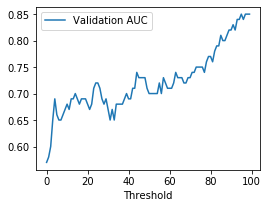

In [316]:

# auc_validation = [i for i in range(0,100)]

f = plt.figure(figsize=(4,3))
# plt.plot(len(auc_train), auc_train, label="Train AUC", color='r')
plt.plot(epoch_validation, auc_validation, label="Validation AUC")
# plt.plot(thresholds, recalls, label="Recall")
# plt.plot(thresholds, f1_scores, label="F1 Score")
plt.xlabel('Threshold')
#     plt.ylabel('Accuracy')
#     plt.title(file[:-4].replace("_", " "))
# f.suptitle(title, fontsize=7)
#     plt.title(title, wrap=True)
plt.legend(loc='upper left')
plt.show()

# f.savefig("plots/"+file[:-11]+"plot.pdf", bbox_inches='tight')
